# Cross-resonance: leakage plot transmon-transmon vs transmon-fluxonium

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import constants
from typing import List, Dict
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [5]:
with open('data_cr_transmon_fluxonium/cr_fidelity_leakage.txt') as file_data:
    result_tf = json.load(file_data)

with open('data_cr_transmon_transmon/cr_leakage.txt') as file_data:
    result_tt = json.load(file_data)


In [47]:
def plot_cr_leakage(
    result_tt: List,
    result_tf: List,
    opt={'fs': 20, 'lw': 2.0, 'ls': 16, 'fsl':14, "ms":6},
    save=False
):
#     if dark:
#         plt.style.use('dark_background')
#         color_plot = 'white'
#     else:
#         plt.style.use('default')
#         color_plot = 'black'
        
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    
    freq_tt = [res["transm_freq"] for res in result_tt]
    l1_tt = [res["L1"] for res in result_tt]
    freq_tf = [res["transm_freq"] for res in result_tf]
    l1_tf = [res["L1"] for res in result_tf]
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    colors = {"tt": "darkblue", "tf": "red"}
    
    ax.semilogy(freq_tf, l1_tf, color=colors["tf"], marker="X", markersize=opt["ms"], linewidth=opt["lw"], 
                label="Transmon-Fluxonium")
    ax.semilogy(freq_tt, l1_tt, color=colors["tt"], marker="o", markersize=opt["ms"], linewidth=opt["lw"], \
                label="Transmon-Transmon")
    
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    x_ticks_latex = ['$4.2$', '$4.4$', '$4.6$', '$4.8$', '$5.0$', '$5.2$', '$5.4$', '$5.6$', '$5.8$']
    y_ticks = [10**(-y) for y in range(1, 9)]
    y_ticks_latex = ['$10^{-1}$', '$10^{-2}$', '$10^{-3}$', '$10^{-4}$', '$10^{-5}$', '$10^{-6}$', 
                     '$10^{-7}$', '$10^{-8}$']
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks_latex)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks_latex)
    ax.tick_params(axis='both', labelsize=opt["ls"])
    
    ax.set_xlabel('$\\omega_t/2 \\pi \, (\\mathrm{GHz})$', fontsize=opt["fs"])
    ax.set_ylabel('$L_1$', fontsize=opt["fs"])
    
    ax.legend(loc='lower left', fontsize=opt["fsl"])
    
    if save:
        plt.savefig("cr_leakage_tt_vs_tf.svg")
    
    
    
    plt.show()

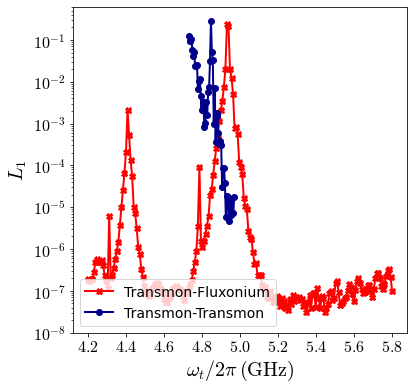

In [48]:
plot_cr_leakage(result_tt, result_tf, save=False)